## 데이터 준비: 다듬기, 변형, 병합, 변형

In [2]:
from numpy.random import randn
import numpy as np
from pandas import Series, DataFrame
import pandas
import pandas as pd

In [3]:
%matplotlib inline

In [9]:
import sims

In [10]:
sims.gen_sim_price

<function sims.gen_sim_price>

## 데이터 병합

### 데이터베이스 스타일 DataFrame 병합

In [4]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df1

data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b

In [5]:
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df2

data2 key
0      0   a
1      1   b
2      2   d

In [6]:
pd.merge(df1, df2)

data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0

In [7]:
pd.merge(df2, df1)

data2 key  data1
0      0   a      2
1      0   a      4
2      0   a      5
3      1   b      0
4      1   b      1
5      1   b      6

In [ ]:
pd.merge(df1, df2, on='key')

열의 공통 이름이 없는 경우

In [4]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

data1 lkey  data2 rkey
0      0    b      1    b
1      1    b      1    b
2      6    b      1    b
3      2    a      0    a
4      4    a      0    a
5      5    a      0    a

합집합은 outer join으로 설정

In [8]:
pd.merge(df1, df2, how='outer')

data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
6      3   c    NaN
7    NaN   d      2

N-대-N 조합

In [9]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df1

data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b

In [10]:
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})
df2

data2 key
0      0   a
1      1   b
2      2   a
3      3   b
4      4   d

In [11]:
pd.merge(df1, df2, on='key', how='left')

data1 key  data2
0       0   b      1
1       0   b      3
2       1   b      1
3       1   b      3
4       2   a      0
5       2   a      2
6       3   c    NaN
7       4   a      0
8       4   a      2
9       5   b      1
10      5   b      3

In [ ]:
pd.merge(df1, df2, how='inner')

In [ ]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

In [ ]:
pd.merge(left, right, on='key1')

In [ ]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

#### 도전과제


주식 종목에 대해 다음 두 가지 형태의 정보가 있다. 첫 번째는, 주식 종목의 회사에 관한 프로필 정보이고, 두 번째 정보는 주식 종목의 일일 가격에 관한 정보이다. 

1. 주어진 두 가지 정보를 단일한 DataFrame으로 합치시오.

In [14]:
company_profile = DataFrame([{u'상호': u'SJ전자',
                              u'종목코드': 100,
                              u'산업분류': '전자'},
                             {u'상호': u'코드베이직',
                              u'종목코드': 101,
                              u'산업분류': '소프트웨어'},
                             {u'상호': u'성주식품',
                              u'종목코드': 102,
                              u'산업분류': '식품'}
                            ])
company_profile

산업분류     상호  종목코드
0     전자   SJ전자   100
1  소프트웨어  코드베이직   101
2     식품   성주식품   102

In [25]:
price_data = sims.gen_sim_price(num_stocks=3, num_days=90)
price_data = price_data.T
end_prices = DataFrame(price_data,
         index=[100, 101, 102])
end_prices

0            1           2            3            4   \
100  1074.684056  1060.830375  824.553208   862.037705   684.909426   
101   310.472015   339.638564  319.307297   377.760282   426.675872   
102   810.933820   729.492895  906.290551  1149.374686  1187.061305   

              5            6           7            8            9   \
100   619.514413   592.612223  750.538802   729.419919   905.870584   
101   328.653650   243.208724  198.730173   237.261499   237.094229   
102  1382.396131  1084.537073  996.783185  1082.139676  1333.096928   

        ...                80           81           82           83  \
100     ...        574.694899   611.437658   560.717960   428.986204   
101     ...         42.610295    40.666555    30.200342    22.188067   
102     ...       2076.390707  2195.093438  2693.610784  2217.599065   

              84           85           86           87           88  \
100   512.004897   580.093691   553.521843   397.356167   320.893645   
101    19.991217    23.328396    25.643460    23.127591    22.999909   
102  1888.630113  2311.627720  2603.014347  2228.119544  2342.429710   

              89  
100   398.286504  
101    24.910208  
102  2705.278008  

[3 rows x 90 columns]

In [30]:
pd.merge(company_profile, end_prices, left_on=u'종목코드', right_index=True)

산업분류     상호  종목코드            0            1           2            3  \
0     전자   SJ전자   100  1074.684056  1060.830375  824.553208   862.037705   
1  소프트웨어  코드베이직   101   310.472015   339.638564  319.307297   377.760282   
2     식품   성주식품   102   810.933820   729.492895  906.290551  1149.374686   

             4            5            6     ...                80  \
0   684.909426   619.514413   592.612223     ...        574.694899   
1   426.675872   328.653650   243.208724     ...         42.610295   
2  1187.061305  1382.396131  1084.537073     ...       2076.390707   

            81           82           83           84           85  \
0   611.437658   560.717960   428.986204   512.004897   580.093691   
1    40.666555    30.200342    22.188067    19.991217    23.328396   
2  2195.093438  2693.610784  2217.599065  1888.630113  2311.627720   

            86           87           88           89  
0   553.521843   397.356167   320.893645   398.286504  
1    25.643460    23.127591    22.999909    24.910208  
2  2603.014347  2228.119544  2342.429710  2705.278008  

[3 rows x 93 columns]

### 인덱스 기준 합치기

In [39]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
left1

key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5

In [40]:
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
right1

group_val
a        3.5
b        7.0

"left의 'key' 열은 right의 인덱스이다"

In [41]:
pd.merge(left1, right1, left_on='key', right_index=True)

key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0

In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

In [ ]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

In [ ]:
righth

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

In [ ]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [ ]:
left2

In [ ]:
right2

In [ ]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

In [ ]:
left2.join(right2, how='outer')

In [ ]:
left1.join(right1, on='key')

In [ ]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [ ]:
left2.join([right2, another])

In [ ]:
left2.join([right2, another], how='outer')

#### 연습 문제

학생들의 신체 발달 정보는 학번, 나이, 신장, 체중 정보를 담고 있다. 각 학생은 또한 성취도 정보에 학번과 세 과목의 시험 점수를 갖는다. 신체발달 정보와 학업성취도의 연관성을 알아보려 한다.

a. 신체발달 정보 기준으로 성취도를 merge 하시오.

b. 성취도를 기준으로 신체발달 정보를 merge 하시오.

In [32]:
import numpy as np

# 신체발달 모의 데이터 생성
ages = np.random.randint(12,18, size=10)
heights = np.random.normal(160, size=10)
weights = np.random.normal(40, size=10)

physical_data = {u'신장': heights, u'체중': weights, u'나이':ages,
                u'학번': range(5,15)}
physical_frame = DataFrame(physical_data)
physical_frame

나이          신장         체중  학번
0  12  160.769723  39.470320   5
1  16  161.336181  40.388564   6
2  15  158.273799  38.218147   7
3  16  160.004215  38.378841   8
4  16  159.058502  40.673683   9
5  12  159.770833  40.922474  10
6  17  159.426132  38.930030  11
7  16  160.677461  39.646879  12
8  14  159.536734  38.408236  13
9  15  161.732760  40.561718  14

In [34]:
# 성취도 모의 데이터 생성
tests_frame = DataFrame(np.random.normal(50, 10, size=(10,3)),
                       columns=[u'국', u'영', u'수'])
tests_frame[u'학번'] = range(10,20)
tests_frame

국          영          수  학번
0  54.196809  50.674796  47.671703  10
1  59.293858  56.726219  38.831409  11
2  63.873630  46.804611  53.811438  12
3  49.682511  36.342635  56.083811  13
4  54.960973  46.622332  44.598420  14
5  30.920529  52.748902  53.060109  15
6  54.650012  56.352235  44.707694  16
7  59.714633  44.866694  49.420394  17
8  50.998477  54.667462  41.686535  18
9  47.790209  59.866725  51.270325  19

In [45]:
# TODO: 문제 1
data = pd.merge(physical_frame, tests_frame, how='outer').set_index(u'학번')
data

나이          신장         체중          국          영          수
학번                                                            
5   12  160.769723  39.470320        NaN        NaN        NaN
6   16  161.336181  40.388564        NaN        NaN        NaN
7   15  158.273799  38.218147        NaN        NaN        NaN
8   16  160.004215  38.378841        NaN        NaN        NaN
9   16  159.058502  40.673683        NaN        NaN        NaN
10  12  159.770833  40.922474  54.196809  50.674796  47.671703
11  17  159.426132  38.930030  59.293858  56.726219  38.831409
12  16  160.677461  39.646879  63.873630  46.804611  53.811438
13  14  159.536734  38.408236  49.682511  36.342635  56.083811
14  15  161.732760  40.561718  54.960973  46.622332  44.598420
15 NaN         NaN        NaN  30.920529  52.748902  53.060109
16 NaN         NaN        NaN  54.650012  56.352235  44.707694
17 NaN         NaN        NaN  59.714633  44.866694  49.420394
18 NaN         NaN        NaN  50.998477  54.667462  41.686535
19 NaN         NaN        NaN  47.790209  59.866725  51.270325

In [37]:
# TODO: 문제 2
pd.merge(tests_frame, physical_frame)

국          영          수  학번  나이          신장         체중
0  54.196809  50.674796  47.671703  10  12  159.770833  40.922474
1  59.293858  56.726219  38.831409  11  17  159.426132  38.930030
2  63.873630  46.804611  53.811438  12  16  160.677461  39.646879
3  49.682511  36.342635  56.083811  13  14  159.536734  38.408236
4  54.960973  46.622332  44.598420  14  15  161.732760  40.561718

### 연습문제

고객 정보가 담긴 customers.csv, 구매 정보가 담긴 purchases.csv, 상품평 정보가 담긴 reviews.csv 파일의 데이터를 활용해 다음을 수행하시오.

a. 구매한 물품별 배송지 정보를 구하시오.

b. 각 고객이 구매한 물품명과 상품평을 표시하시오.

### 축 따라 이어붙이기

In [ ]:
arr = np.arange(12).reshape((3, 4))

In [ ]:
np.concatenate([arr, arr], axis=1)

In [47]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

print(s1)
print(s2)
print(s3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [6]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [7]:
pd.concat([s1, s2, s3], axis=1)

0   1   2
a   0 NaN NaN
b   1 NaN NaN
c NaN   2 NaN
d NaN   3 NaN
e NaN   4 NaN
f NaN NaN   5
g NaN NaN   6

In [48]:
s4 = pd.concat([s1 * 5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [49]:
pd.concat([s1, s4], axis=1)

0  1
a   0  0
b   1  5
f NaN  5
g NaN  6

In [50]:
pd.concat([s1, s4], axis=1, join='inner')

0  1
a  0  0
b  1  5

In [51]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

0   1
a   0   0
c NaN NaN
b   1   5
e NaN NaN

In [ ]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [ ]:
result

In [ ]:
# Much more on the unstack function later
result.unstack()

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

DataFrame 축 따라 이어 붙이기

In [52]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [53]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

In [44]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [ ]:
df1

In [ ]:
df2

In [47]:
pd.concat([df1, df2], ignore_index=True)

a         b         c         d
0 -0.348124  0.943158 -0.117074  1.019861
1 -0.820716 -1.599333  0.298164  0.227103
2 -0.619864  0.290818  1.793764  0.165982
3 -1.853051 -0.737803       NaN -1.301149
4 -1.506363 -0.198649       NaN -2.426967

### 겹치는 데이터 합치기

In [ ]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [ ]:
a

In [ ]:
b

In [ ]:
np.where(pd.isnull(a), b, a)

In [ ]:
b[:-2].combine_first(a[2:])

In [ ]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})

In [50]:
pd.merge(df1, df2)

a   b   c
0  5 NaN  10

In [49]:
pd.concat([df1, df2])

a   b   c
0   1 NaN   2
1 NaN   2   6
2   5 NaN  10
3 NaN   6  14
0   5 NaN NaN
1   4   3 NaN
2 NaN   4 NaN
3   3   6 NaN
4   7   8 NaN

In [48]:
df1.combine_first(df2)

a   b   c
0  1 NaN   2
1  4   2   6
2  5   4  10
3  3   6  14
4  7   8 NaN

## 재형성과 피벗

### 계층 색인 재구성

In [ ]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

In [ ]:
result = data.stack()
result

In [ ]:
result.unstack()

In [ ]:
result.unstack(0)

In [ ]:
result.unstack('state')

In [ ]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

In [ ]:
data2.unstack().stack()

In [ ]:
data2.unstack().stack(dropna=False)

In [ ]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

In [ ]:
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### 가로 세로 방향 피벗

In [ ]:
data = pd.read_csv('ch07/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [ ]:
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

In [ ]:
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

## 데이터 변형

### 중복 제거

In [51]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4

In [52]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [53]:
data.drop_duplicates()

k1  k2
0  one   1
2  one   2
3  two   3
5  two   4

In [ ]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

In [ ]:
data.drop_duplicates(['k1', 'k2'], take_last=True)

### 함수 또는 매핑으로 데이터 변형

In [54]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

In [55]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [56]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

In [57]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### 값 교체

In [ ]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

In [ ]:
data.replace(-999, np.nan)

In [ ]:
data.replace([-999, -1000], np.nan)

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
data.replace({-999: np.nan, -1000: 0})

### 축 인덱스 이름변경

In [58]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [59]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [60]:
data.index = data.index.map(str.upper)
data

one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11

In [61]:
data.rename(index=str.title, columns=str.upper)

ONE  TWO  THREE  FOUR
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

In [62]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

one  two  peekaboo  four
INDIANA     0    1         2     3
COLORADO    4    5         6     7
NEW YORK    8    9        10    11

In [ ]:
# Always returns a reference to a DataFrame
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

### 개별화와 양자화

In [70]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [72]:
bins = [18, 25, 35, 45, 55, 65, 100]

cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (55, 65], (35, 45], (35, 45], (25, 35]]
Length: 12
Categories (6, object): [(18, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65] < (65, 100]]

In [75]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 4, 2, 2, 1], dtype=int8)

In [77]:
cats.categories

Index([u'(18, 25]', u'(25, 35]', u'(35, 45]', u'(45, 55]', u'(55, 65]', u'(65, 100]'], dtype='object')

In [78]:
pd.value_counts(cats)

(18, 25]     5
(35, 45]     3
(25, 35]     3
(55, 65]     1
(65, 100]    0
(45, 55]     0
dtype: int64

### 특이값 탐지와 선별

In [ ]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

In [ ]:
col = data[3]
col[np.abs(col) > 3]

In [ ]:
data[(np.abs(data) > 3).any(1)]

In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

### 치환과 무작위 표본추출

In [ ]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

In [ ]:
df

In [ ]:
df.take(sampler)

In [ ]:
df.take(np.random.permutation(len(df))[:3])

In [ ]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)

In [ ]:
sampler

In [ ]:
draws = bag.take(sampler)
draws

### 표시자/더미 변수

In [ ]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

In [ ]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch07/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

In [ ]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [ ]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

In [ ]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

In [ ]:
np.random.seed(12345)

In [ ]:
values = np.random.rand(10)
values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

## 문자열 조작

### 문자열 객체 메서드

In [ ]:
val = 'a,b,  guido'
val.split(',')

In [ ]:
pieces = [x.strip() for x in val.split(',')]
pieces

In [ ]:
first, second, third = pieces
first + '::' + second + '::' + third

In [ ]:
'::'.join(pieces)

In [ ]:
'guido' in val

In [ ]:
val.index(',')

In [ ]:
val.find(':')

In [ ]:
val.index(':')

In [ ]:
val.count(',')

In [ ]:
val.replace(',', '::')

In [ ]:
val.replace(',', '')

### 정규식(Regular expressions)

In [ ]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

In [ ]:
regex = re.compile('\s+')
regex.split(text)

In [ ]:
regex.findall(text)

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

In [ ]:
m = regex.search(text)
m

In [ ]:
text[m.start():m.end()]

In [ ]:
print(regex.match(text))

In [ ]:
print(regex.sub('REDACTED', text))

In [ ]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
m = regex.match('wesm@bright.net')
m.groups()

In [ ]:
regex.findall(text)

In [ ]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

In [ ]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [ ]:
m = regex.match('wesm@bright.net')
m.groupdict()

### pandas의 벡터화된 문자열 함수

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [ ]:
data

In [ ]:
data.isnull()

In [ ]:
data.str.contains('gmail')

In [ ]:
pattern

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

In [ ]:
matches.str.get(1)

In [ ]:
matches.str[0]

In [ ]:
data.str[:5]

## 예제: 미국 농무부 음식 데이터베이스

JSON 파일을 읽어들여 파이썬 객체 생성하기

In [54]:
import json
db = json.load(open('pydata/ch07/foods-2011-10-03.json'))
len(db)

6636

In [11]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [55]:
DataFrame(db)

description  \
0                                       Cheese, caraway   
1                                       Cheese, cheddar   
2                                          Cheese, edam   
3                                          Cheese, feta   
4                    Cheese, mozzarella, part skim milk   
5      Cheese, mozzarella, part skim milk, low moisture   
6                                        Cheese, romano   
7                                     Cheese, roquefort   
8     Cheese spread, pasteurized process, american, ...   
9                           Cream, fluid, half and half   
10    Sour dressing, non-butterfat, cultured, filled...   
11    Milk, filled, fluid, with blend of hydrogenate...   
12    Cream substitute, liquid, with lauric acid oil...   
13                           Cream substitute, powdered   
14                  Milk, producer, fluid, 3.7% milkfat   
15    Milk, reduced fat, fluid, 2% milkfat, with add...   
16    Milk, reduced fat, fluid, 2% milkfat, with add...   
17    Milk, reduced fat, fluid, 2% milkfat, protein ...   
18    Milk, lowfat, fluid, 1% milkfat, with added vi...   
19    Milk, lowfat, fluid, 1% milkfat, with added no...   
20    Milk, lowfat, fluid, 1% milkfat, protein forti...   
21    Milk, nonfat, fluid, with added vitamin A and ...   
22    Milk, nonfat, fluid, with added nonfat milk so...   
23    Milk, nonfat, fluid, protein fortified, with a...   
24            Milk, buttermilk, fluid, cultured, lowfat   
25                              Milk, low sodium, fluid   
26               Milk, dry, whole, with added vitamin D   
27    Milk, dry, nonfat, regular, without added vita...   
28    Milk, dry, nonfat, instant, with added vitamin...   
29                   Milk, dry, nonfat, calcium reduced   
...                                                 ...   
6606  Beef, tenderloin, steak, separable lean only, ...   
6607  Beef, top sirloin, steak, separable lean only,...   
6608  Beef, short loin, top loin, steak, separable l...   
6609  Beef, chuck, arm pot roast, separable lean onl...   
6610  Beef, brisket, flat half, separable lean only,...   
6611  Beef, chuck, arm pot roast, separable lean onl...   
6612  Beef, brisket, flat half, separable lean only,...   
6613  Beef, round, eye of round, roast, separable le...   
6614  Beef, round, top round, steak, separable lean ...   
6615  Beef, round, bottom round, roast, separable le...   
6616  Beef, rib, small end (ribs 10-12), separable l...   
6617  CAMPBELL Soup Company, CAMPBELL'S Red and Whit...   
6618  CAMPBELL Soup Company, CAMPBELL's Red and Whit...   
6619  CAMPBELL Soup Company, CAMPBELL'S SELECT Soups...   
6620  CAMPBELL Soup Company, CAMPBELL'S SOUP AT HAND...   
6621  CAMPBELL Soup Company, CAMPBELL'S SOUP AT HAND...   
6622  CAMPBELL Soup Company, CAMPBELL'S SELECT Gold ...   
6623  CAMPBELL Soup Company, CAMPBELL'S SELECT Gold ...   
6624  CAMPBELL Soup Company, CAMPBELL'S SELECT Gold ...   
6625  CAMPBELL Soup Company, CAMPBELL'S Red and Whit...   
6626  CAMPBELL Soup Company, V8 Vegetable Juice, Ess...   
6627  CAMPBELL Soup Company, V8 Vegetable Juice, Spi...   
6628  CAMPBELL Soup Company, PACE, Jalapenos Nacho S...   
6629  CAMPBELL Soup Company, V8 60% Vegetable Juice,...   
6630  CAMPBELL Soup Company, V8 Vegetable Juice, Low...   
6631                             Bologna, beef, low fat   
6632  Turkey and pork sausage, fresh, bulk, patty or...   
6633                              Babyfood, juice, pear   
6634         Babyfood, dessert, banana yogurt, strained   
6635              Babyfood, banana no tapioca, strained   

                                  group     id       manufacturer  \
0                Dairy and Egg Products   1008                      
1                Dairy and Egg Products   1009                      
2                Dairy and Egg Products   1018                      
3                Dairy and Egg Products   1019                      
4                Dairy and Egg Products 

In [57]:
DataFrame(db[0]['nutrients'])

description        group    units     value
0                               Protein  Composition        g    25.180
1                     Total lipid (fat)  Composition        g    29.200
2           Carbohydrate, by difference  Composition        g     3.060
3                                   Ash        Other        g     3.280
4                                Energy       Energy     kcal   376.000
5                                 Water  Composition        g    39.280
6                                Energy       Energy       kJ  1573.000
7                  Fiber, total dietary  Composition        g     0.000
8                           Calcium, Ca     Elements       mg   673.000
9                              Iron, Fe     Elements       mg     0.640
10                        Magnesium, Mg     Elements       mg    22.000
11                        Phosphorus, P     Elements       mg   490.000
12                         Potassium, K     Elements       mg    93.000
13                           Sodium, Na     Elements       mg   690.000
14                             Zinc, Zn     Elements       mg     2.940
15                           Copper, Cu     Elements       mg     0.024
16                        Manganese, Mn     Elements       mg     0.021
17                         Selenium, Se     Elements      mcg    14.500
18                        Vitamin A, IU     Vitamins       IU  1054.000
19                              Retinol     Vitamins      mcg   262.000
20                       Vitamin A, RAE     Vitamins  mcg_RAE   271.000
21       Vitamin C, total ascorbic acid     Vitamins       mg     0.000
22                              Thiamin     Vitamins       mg     0.031
23                           Riboflavin     Vitamins       mg     0.450
24                               Niacin     Vitamins       mg     0.180
25                     Pantothenic acid     Vitamins       mg     0.190
26                          Vitamin B-6     Vitamins       mg     0.074
27                        Folate, total     Vitamins      mcg    18.000
28                         Vitamin B-12     Vitamins      mcg     0.270
29                           Folic acid     Vitamins      mcg     0.000
..                                  ...          ...      ...       ...
132                              Niacin     Vitamins       mg     0.180
133                    Pantothenic acid     Vitamins       mg     0.190
134                         Vitamin B-6     Vitamins       mg     0.074
135                       Folate, total     Vitamins      mcg    18.000
136                        Vitamin B-12     Vitamins      mcg     0.270
137                          Folic acid     Vitamins      mcg     0.000
138                        Folate, food     Vitamins      mcg    18.000
139                         Folate, DFE     Vitamins  mcg_DFE    18.000
140                          Tryptophan  Amino Acids        g     0.324
141                           Threonine  Amino Acids        g     0.896
142                          Isoleucine  Amino Acids        g     1.563
143                             Leucine  Amino Acids        g     2.412
144                              Lysine  Amino Acids        g     2.095
145                          Methionine  Amino Acids        g     0.659
146                             Cystine  Amino Acids        g     0.126
147                       Phenylalanine  Amino Acids        g     1.326
148                            Tyrosine  Amino Acids        g     1.216
149                              Valine  Amino Acids        g     1.682
150                            Arginine  Amino Acids        g     0.952
151                           Histidine  Amino Acids        g     0.884
152                             Alanine  Amino Acids        g     0.711
153                       Aspartic acid  Amino Acids        g     1.618
154                       Glutamic acid  Amino Acids        g     6.160
155                             Glycine  Amino Acids        g     0.

In [35]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

description        group units    value
0                      Protein  Composition     g    25.18
1            Total lipid (fat)  Composition     g    29.20
2  Carbohydrate, by difference  Composition     g     3.06
3                          Ash        Other     g     3.28
4                       Energy       Energy  kcal   376.00
5                        Water  Composition     g    39.28
6                       Energy       Energy    kJ  1573.00

In [59]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)
info[:5]

description                   group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4

음식 분류별 개수 통계 산출

In [60]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
dtype: int64

데이터의 각 음식의 nutrients 정보를 추출해, 모든 음식의 영양 정보를 포함하는 단일한 DataFrame 생성

In [61]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

# 각각의 DatFrame을 인덱스 축 따라 이어붙이기
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients

description        group    units     value  \
0                                  Protein  Composition        g    25.180   
1                        Total lipid (fat)  Composition        g    29.200   
2              Carbohydrate, by difference  Composition        g     3.060   
3                                      Ash        Other        g     3.280   
4                                   Energy       Energy     kcal   376.000   
5                                    Water  Composition        g    39.280   
6                                   Energy       Energy       kJ  1573.000   
7                     Fiber, total dietary  Composition        g     0.000   
8                              Calcium, Ca     Elements       mg   673.000   
9                                 Iron, Fe     Elements       mg     0.640   
10                           Magnesium, Mg     Elements       mg    22.000   
11                           Phosphorus, P     Elements       mg   490.000   
12                            Potassium, K     Elements       mg    93.000   
13                              Sodium, Na     Elements       mg   690.000   
14                                Zinc, Zn     Elements       mg     2.940   
15                              Copper, Cu     Elements       mg     0.024   
16                           Manganese, Mn     Elements       mg     0.021   
17                            Selenium, Se     Elements      mcg    14.500   
18                           Vitamin A, IU     Vitamins       IU  1054.000   
19                                 Retinol     Vitamins      mcg   262.000   
20                          Vitamin A, RAE     Vitamins  mcg_RAE   271.000   
21          Vitamin C, total ascorbic acid     Vitamins       mg     0.000   
22                                 Thiamin     Vitamins       mg     0.031   
23                              Riboflavin     Vitamins       mg     0.450   
24                                  Niacin     Vitamins       mg     0.180   
25                        Pantothenic acid     Vitamins       mg     0.190   
26                             Vitamin B-6     Vitamins       mg     0.074   
27                           Folate, total     Vitamins      mcg    18.000   
28                            Vitamin B-12     Vitamins      mcg     0.270   
29                              Folic acid     Vitamins      mcg     0.000   
...                                    ...          ...      ...       ...   
389325                        Selenium, Se     Elements      mcg     1.100   
389326                       Vitamin A, IU     Vitamins       IU     5.000   
389327                             Retinol     Vitamins      mcg     0.000   
389328                      Vitamin A, RAE     Vitamins  mcg_RAE     0.000   
389329                      Carotene, beta     Vitamins      mcg     2.000   
389330                     Carotene, alpha     Vitamins      mcg     2.000   
389331        Vitamin E (alpha-tocopherol)     Vitamins       mg     0.250   
389332                           Vitamin D     Vitamins       IU     0.000   
389333                 Vitamin D (D2 + D3)     Vitamins      mcg     0.000   
389334                 Cryptoxanthin, beta     Vitamins      mcg     0.000   
389335                            Lycopene     Vitamins      mcg     0.000   
389336                 Lutein + zeaxanthin     Vitamins      mcg    20.000   
389337      Vitamin C, total ascorbic acid     Vitamins       mg    21.900   
389338                             Thiamin     Vitamins       mg     0.020   
389339                          Riboflavin     Vitamins       mg     0.060   
389340                              Niacin     Vitamins       mg     0.540   
389341                         Vitamin B-6     Vitamins       mg     0.260   
389342                       Folate, total     Vitamins      mcg    17.000   
389343                        Vitamin B-12     Vitamins      mcg     0.000   
389344                      Choline, total     Vitami

중복데이터가 많음

In [63]:
nutrients.duplicated().sum()

14179

중복제거

In [65]:
nutrients = nutrients.drop_duplicates()
nutrients.duplicated().sum()

0

열 제목 변경

In [68]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

food  \
0                                       Cheese, caraway   
1                                       Cheese, cheddar   
2                                          Cheese, edam   
3                                          Cheese, feta   
4                    Cheese, mozzarella, part skim milk   
5      Cheese, mozzarella, part skim milk, low moisture   
6                                        Cheese, romano   
7                                     Cheese, roquefort   
8     Cheese spread, pasteurized process, american, ...   
9                           Cream, fluid, half and half   
10    Sour dressing, non-butterfat, cultured, filled...   
11    Milk, filled, fluid, with blend of hydrogenate...   
12    Cream substitute, liquid, with lauric acid oil...   
13                           Cream substitute, powdered   
14                  Milk, producer, fluid, 3.7% milkfat   
15    Milk, reduced fat, fluid, 2% milkfat, with add...   
16    Milk, reduced fat, fluid, 2% milkfat, with add...   
17    Milk, reduced fat, fluid, 2% milkfat, protein ...   
18    Milk, lowfat, fluid, 1% milkfat, with added vi...   
19    Milk, lowfat, fluid, 1% milkfat, with added no...   
20    Milk, lowfat, fluid, 1% milkfat, protein forti...   
21    Milk, nonfat, fluid, with added vitamin A and ...   
22    Milk, nonfat, fluid, with added nonfat milk so...   
23    Milk, nonfat, fluid, protein fortified, with a...   
24            Milk, buttermilk, fluid, cultured, lowfat   
25                              Milk, low sodium, fluid   
26               Milk, dry, whole, with added vitamin D   
27    Milk, dry, nonfat, regular, without added vita...   
28    Milk, dry, nonfat, instant, with added vitamin...   
29                   Milk, dry, nonfat, calcium reduced   
...                                                 ...   
6606  Beef, tenderloin, steak, separable lean only, ...   
6607  Beef, top sirloin, steak, separable lean only,...   
6608  Beef, short loin, top loin, steak, separable l...   
6609  Beef, chuck, arm pot roast, separable lean onl...   
6610  Beef, brisket, flat half, separable lean only,...   
6611  Beef, chuck, arm pot roast, separable lean onl...   
6612  Beef, brisket, flat half, separable lean only,...   
6613  Beef, round, eye of round, roast, separable le...   
6614  Beef, round, top round, steak, separable lean ...   
6615  Beef, round, bottom round, roast, separable le...   
6616  Beef, rib, small end (ribs 10-12), separable l...   
6617  CAMPBELL Soup Company, CAMPBELL'S Red and Whit...   
6618  CAMPBELL Soup Company, CAMPBELL's Red and Whit...   
6619  CAMPBELL Soup Company, CAMPBELL'S SELECT Soups...   
6620  CAMPBELL Soup Company, CAMPBELL'S SOUP AT HAND...   
6621  CAMPBELL Soup Company, CAMPBELL'S SOUP AT HAND...   
6622  CAMPBELL Soup Company, CAMPBELL'S SELECT Gold ...   
6623  CAMPBELL Soup Company, CAMPBELL'S SELECT Gold ...   
6624  CAMPBELL Soup Company, CAMPBELL'S SELECT Gold ...   
6625  CAMPBELL Soup Company, CAMPBELL'S Red and Whit...   
6626  CAMPBELL Soup Company, V8 Vegetable Juice, Ess...   
6627  CAMPBELL Soup Company, V8 Vegetable Juice, Spi...   
6628  CAMPBELL Soup Company, PACE, Jalapenos Nacho S...   
6629  CAMPBELL Soup Company, V8 60% Vegetable Juice,...   
6630  CAMPBELL Soup Company, V8 Vegetable Juice, Low...   
6631                             Bologna, beef, low fat   
6632  Turkey and pork sausage, fresh, bulk, patty or...   
6633                              Babyfood, juice, pear   
6634         Babyfood, dessert, banana yogurt, strained   
6635              Babyfood, banana no tapioca, strained   

                                 fgroup     id       manufacturer  
0                Dairy and Egg Products   1008                     
1                Dairy and Egg Products   1009                     
2                Dairy and Egg Products   1018                     
3                Dairy and Egg Products   1019                     
4                Dairy and Egg Products   1028      

In [67]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

nutrient     nutgroup    units     value  \
0                                  Protein  Composition        g    25.180   
1                        Total lipid (fat)  Composition        g    29.200   
2              Carbohydrate, by difference  Composition        g     3.060   
3                                      Ash        Other        g     3.280   
4                                   Energy       Energy     kcal   376.000   
5                                    Water  Composition        g    39.280   
6                                   Energy       Energy       kJ  1573.000   
7                     Fiber, total dietary  Composition        g     0.000   
8                              Calcium, Ca     Elements       mg   673.000   
9                                 Iron, Fe     Elements       mg     0.640   
10                           Magnesium, Mg     Elements       mg    22.000   
11                           Phosphorus, P     Elements       mg   490.000   
12                            Potassium, K     Elements       mg    93.000   
13                              Sodium, Na     Elements       mg   690.000   
14                                Zinc, Zn     Elements       mg     2.940   
15                              Copper, Cu     Elements       mg     0.024   
16                           Manganese, Mn     Elements       mg     0.021   
17                            Selenium, Se     Elements      mcg    14.500   
18                           Vitamin A, IU     Vitamins       IU  1054.000   
19                                 Retinol     Vitamins      mcg   262.000   
20                          Vitamin A, RAE     Vitamins  mcg_RAE   271.000   
21          Vitamin C, total ascorbic acid     Vitamins       mg     0.000   
22                                 Thiamin     Vitamins       mg     0.031   
23                              Riboflavin     Vitamins       mg     0.450   
24                                  Niacin     Vitamins       mg     0.180   
25                        Pantothenic acid     Vitamins       mg     0.190   
26                             Vitamin B-6     Vitamins       mg     0.074   
27                           Folate, total     Vitamins      mcg    18.000   
28                            Vitamin B-12     Vitamins      mcg     0.270   
29                              Folic acid     Vitamins      mcg     0.000   
...                                    ...          ...      ...       ...   
389325                        Selenium, Se     Elements      mcg     1.100   
389326                       Vitamin A, IU     Vitamins       IU     5.000   
389327                             Retinol     Vitamins      mcg     0.000   
389328                      Vitamin A, RAE     Vitamins  mcg_RAE     0.000   
389329                      Carotene, beta     Vitamins      mcg     2.000   
389330                     Carotene, alpha     Vitamins      mcg     2.000   
389331        Vitamin E (alpha-tocopherol)     Vitamins       mg     0.250   
389332                           Vitamin D     Vitamins       IU     0.000   
389333                 Vitamin D (D2 + D3)     Vitamins      mcg     0.000   
389334                 Cryptoxanthin, beta     Vitamins      mcg     0.000   
389335                            Lycopene     Vitamins      mcg     0.000   
389336                 Lutein + zeaxanthin     Vitamins      mcg    20.000   
389337      Vitamin C, total ascorbic acid     Vitamins       mg    21.900   
389338                             Thiamin     Vitamins       mg     0.020   
389339                          Riboflavin     Vitamins       mg     0.060   
389340                              Niacin     Vitamins       mg     0.540   
389341                         Vitamin B-6     Vitamins       mg     0.260   
389342                       Folate, total     Vitamins      mcg    17.000   
389343                        Vitamin B-12     Vitamins      mcg     0.000   
389344                      Choline, total     Vitamins 

In [69]:
ndata = pd.merge(nutrients, info, on='id', how='outer')
ndata

nutrient     nutgroup    units     value  \
0                                  Protein  Composition        g    25.180   
1                        Total lipid (fat)  Composition        g    29.200   
2              Carbohydrate, by difference  Composition        g     3.060   
3                                      Ash        Other        g     3.280   
4                                   Energy       Energy     kcal   376.000   
5                                    Water  Composition        g    39.280   
6                                   Energy       Energy       kJ  1573.000   
7                     Fiber, total dietary  Composition        g     0.000   
8                              Calcium, Ca     Elements       mg   673.000   
9                                 Iron, Fe     Elements       mg     0.640   
10                           Magnesium, Mg     Elements       mg    22.000   
11                           Phosphorus, P     Elements       mg   490.000   
12                            Potassium, K     Elements       mg    93.000   
13                              Sodium, Na     Elements       mg   690.000   
14                                Zinc, Zn     Elements       mg     2.940   
15                              Copper, Cu     Elements       mg     0.024   
16                           Manganese, Mn     Elements       mg     0.021   
17                            Selenium, Se     Elements      mcg    14.500   
18                           Vitamin A, IU     Vitamins       IU  1054.000   
19                                 Retinol     Vitamins      mcg   262.000   
20                          Vitamin A, RAE     Vitamins  mcg_RAE   271.000   
21          Vitamin C, total ascorbic acid     Vitamins       mg     0.000   
22                                 Thiamin     Vitamins       mg     0.031   
23                              Riboflavin     Vitamins       mg     0.450   
24                                  Niacin     Vitamins       mg     0.180   
25                        Pantothenic acid     Vitamins       mg     0.190   
26                             Vitamin B-6     Vitamins       mg     0.074   
27                           Folate, total     Vitamins      mcg    18.000   
28                            Vitamin B-12     Vitamins      mcg     0.270   
29                              Folic acid     Vitamins      mcg     0.000   
...                                    ...          ...      ...       ...   
375146                        Selenium, Se     Elements      mcg     1.100   
375147                       Vitamin A, IU     Vitamins       IU     5.000   
375148                             Retinol     Vitamins      mcg     0.000   
375149                      Vitamin A, RAE     Vitamins  mcg_RAE     0.000   
375150                      Carotene, beta     Vitamins      mcg     2.000   
375151                     Carotene, alpha     Vitamins      mcg     2.000   
375152        Vitamin E (alpha-tocopherol)     Vitamins       mg     0.250   
375153                           Vitamin D     Vitamins       IU     0.000   
375154                 Vitamin D (D2 + D3)     Vitamins      mcg     0.000   
375155                 Cryptoxanthin, beta     Vitamins      mcg     0.000   
375156                            Lycopene     Vitamins      mcg     0.000   
375157                 Lutein + zeaxanthin     Vitamins      mcg    20.000   
375158      Vitamin C, total ascorbic acid     Vitamins       mg    21.900   
375159                             Thiamin     Vitamins       mg     0.020   
375160                          Riboflavin     Vitamins       mg     0.060   
375161                              Niacin     Vitamins       mg     0.540   
375162                         Vitamin B-6     Vitamins       mg     0.260   
375163                       Folate, total     Vitamins      mcg    17.000   
375164                        Vitamin B-12     Vitamins      mcg     0.000   
375165                      Choline, total     Vitamins 

In [23]:
ndata.ix[30000]

nutrient                                           Vitamin A, RAE
nutgroup                                                 Vitamins
units                                                     mcg_RAE
value                                                         473
id                                                           3950
description     Infant formula, ABBOTT NUTRITION, SIMILAC, ADV...
group                                                  Baby Foods
manufacturer                                                 None
Name: 30000, dtype: object

그래프 생성: 영영소 그룹에 따른 아연 함유량

In [30]:
%matplotlib inline

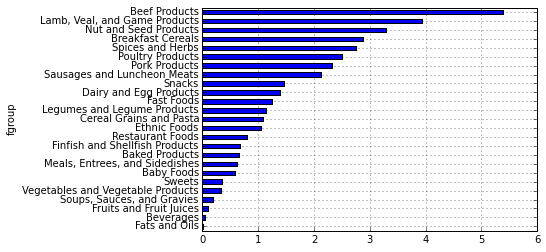

In [31]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].\
    quantile(0.5)
result['Zinc, Zn'].order().plot(kind='barh')

각 영양소가 많이 들어있는 음식

In [32]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

아미노산(Amino acids)가 많이 들어있는 음식 정보 선택

In [33]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 